In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join('data')
OUTPUT_CSV = os.path.join(DATA_PATH,'output','diamonds_with_missing.csv')

In [3]:
df_dia = sns.load_dataset("diamonds")
df_dia2 = df_dia.copy()

# priceカラムを一番うしろに設定
y_column = "price"
X_columns = df_dia2.columns.to_list()
X_columns.remove(y_column)
X = df_dia2[X_columns]
y = df_dia2[y_column]
df_dia3 = X.join(y)

# priceカラムにのみ1%程度の欠損値を追加
mask = np.random.rand(len(df_dia3)) < 0.01
df_dia3.loc[mask, 'price'] = np.nan

df_dia3.sample(7)

,carat,cut,color,clarity,depth,table,x,y,z,price
24795,1.55,Ideal,E,SI1,61.5,56.0,7.36,7.40,4.54,13171.0
46396,0.50,Ideal,D,SI1,59.9,60.0,5.15,5.13,3.08,1764.0
11914,1.07,Premium,H,SI1,61.5,57.0,6.63,6.55,4.05,5123.0
25593,1.54,Premium,G,VS1,61.1,56.0,7.54,7.48,4.59,14438.0
12116,0.90,Very Good,F,VS1,61.5,55.0,6.25,6.28,3.85,5167.0
40280,0.32,Ideal,J,VVS1,60.8,56.0,4.47,4.48,2.72,494.0
28487,0.42,Very Good,D,SI2,62.0,59.0,4.78,4.83,2.98,672.0


In [4]:
df_dia3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
 9   price    53417 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


In [5]:
df_dia3.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
x            0
y            0
z            0
price      523
dtype: int64

In [6]:
# データの保存（オプション）
df_dia3.to_csv(OUTPUT_CSV)

In [7]:
df_dia3.columns.to_list()

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']

In [8]:
df_dia4 = df_dia3.dropna(how='any')
df_dia4

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335.0
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757.0
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757.0
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757.0
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757.0


In [9]:
df_dia4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53417 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53417 non-null  float64 
 1   cut      53417 non-null  category
 2   color    53417 non-null  category
 3   clarity  53417 non-null  category
 4   depth    53417 non-null  float64 
 5   table    53417 non-null  float64 
 6   x        53417 non-null  float64 
 7   y        53417 non-null  float64 
 8   z        53417 non-null  float64 
 9   price    53417 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.4 MB


In [10]:
df_dia4.describe()

,carat,depth,table,x,y,z,price
count,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000
mean,0.798291,61.749668,57.456791,5.731958,5.735347,3.539229,3935.068087
std,0.474236,1.432796,2.234662,1.122086,1.142718,0.706073,3990.991498
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5329.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

X = df_dia4.iloc[:, :-1]
y = df_dia4.iloc[:, -1]

categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X[cat])
    X[cat] = le.transform(X[cat])
    X[cat] = X[cat].astype('category')

X

['cut', 'color', 'clarity']


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))

[10191.20941962   578.00997276  9289.50442528 ...  2440.74196335
  9289.50442528 14597.76897414]
0.9357872153735033


In [13]:
y_test.head()

20619     8918.0
6375       576.0
20283     8703.0
19702      624.0
24186    12373.0
Name: price, dtype: float64

In [14]:
y_pred

array([10191.20941962,   578.00997276,  9289.50442528, ...,
        2440.74196335,  9289.50442528, 14597.76897414])

In [15]:
df_pred = pd.DataFrame(y_test)
df_pred['y_pred'] = y_pred
df_pred.head()

,price,y_pred
20619,8918.0,10191.209420
6375,576.0,578.009973
20283,8703.0,9289.504425
19702,624.0,797.244427
24186,12373.0,10347.744817


Text(0, 0.5, 'pred')

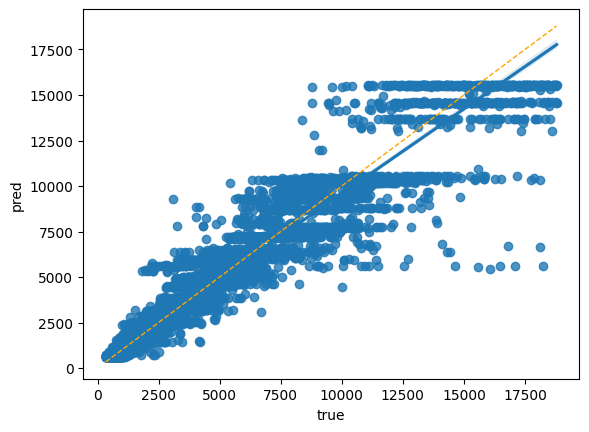

In [16]:
#CONFIDENCE_INTERVAL = 95 # default. 2σ. 有意差ではよく使用される指標
#CONFIDENCE_INTERVAL = 99.73 # 3σ. 平均から3σ以上に多くのデータがある場合正規分布ではないと疑われやすい
#CONFIDENCE_INTERVAL = 99.9936 # 4σ. 1000点の標本に4σ以上の残差を持つデータがある場合、正規性に疑問を呈する
#CONFIDENCE_INTERVAL = 99.999942 # 5σ. 素粒子物理学の分野では、5σ（99.99994%信頼区間の外）が「発見」に必要だとされている。
CONFIDENCE_INTERVAL = 99.99999980 # 6σ. 

ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred.price.min(), df_pred.price.max()]
sns.regplot(x=df_pred.price, y=df_pred.y_pred, ci=CONFIDENCE_INTERVAL)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

- カテゴリカル変数を含んでいる点は良い
- 比較的性能の良いモデルが出来ている点も良いと思う（決定係数で0.88）